#  Basic Data Analysis

In this exploration notebook, we shall try to uncover the basic information about the dataset which will help us build our models / features. The Dataset of this competition is an anonymized sample of over 3,000,000 grocery orders from more than 200,000 Instacart users. 
Now we have to predict which previously purchased products will be in a user’s next order.

So let's get started by importing important modules .

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting

from functools import partial # to reduce df memory consumption by applying to_numeric

color = sns.color_palette() # adjusting plotting style
import warnings
warnings.filterwarnings('ignore') # silence annoying warnings

%matplotlib inline
from subprocess import check_output

# Any results you write to the current directory are saved as output.

##  Load Datasets

### 1. Load aisles.csv 
Short description of product type

In [3]:
df_aisles = pd.read_csv('data/aisles.csv')
print('Total number aisles: {}'.format(df_aisles.shape[0]))
df_aisles.head(5)

Total number aisles: 134


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


### 2. Departments.csv 
Contains all different product departments

In [4]:
df_department = pd.read_csv('data/departments.csv')
print('Total numbers of depatment: {}'.format(df_department.shape[0]))
df_department.head()

Total numbers of depatment: 21


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### 3. Load Prior data 
Contains previous order contents for all customers.  Here **reordered** indicates that the customer has a previous order that contains the product. 

In [5]:
df_prior = pd.read_csv('data/order_products__prior.csv')
print('Total no. of rows: {}'.format(df_prior.shape[0]))
df_prior.head()

Total no. of rows: 32434489


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


### 4. Orders.csv
Contains the orders-users map information  of all order sets (prior , train, test) and other information regarding  all orders .

In [6]:
df_orders = pd.read_csv('data/orders.csv')
print('Total no. of orders: {}'.format(df_orders.shape[0]))
df_orders.head()

Total no. of orders: 3421083


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


### 5. Loading Product.csv
Information regarding each individual products.

In [7]:
df_products = pd.read_csv('data/products.csv')
print('Total no. of products: {}'.format(df_products.shape[0]))
df_products.head()

Total no. of products: 49688


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


### 6. Training Data

In [8]:
df_train = pd.read_csv('data/order_products__train.csv')
print('Total no. of rows: {}'.format(df_train.shape[0]))
df_train.head()

Total no. of rows: 1384617


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


### Combine Product , Asile and Department info into single Dataframe for better understanding

In [9]:
df_complete_prod = pd.merge(left=pd.merge(left=df_products, right=df_department, how='left'), right=df_aisles, how='left').drop(['department_id', 'aisle_id'], axis=1)
df_complete_prod.head()

,product_id,product_name,department,aisle
0,1,Chocolate Sandwich Cookies,snacks,cookies cakes
1,2,All-Seasons Salt,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,frozen,frozen meals
4,5,Green Chile Anytime Sauce,pantry,marinades meat preparation


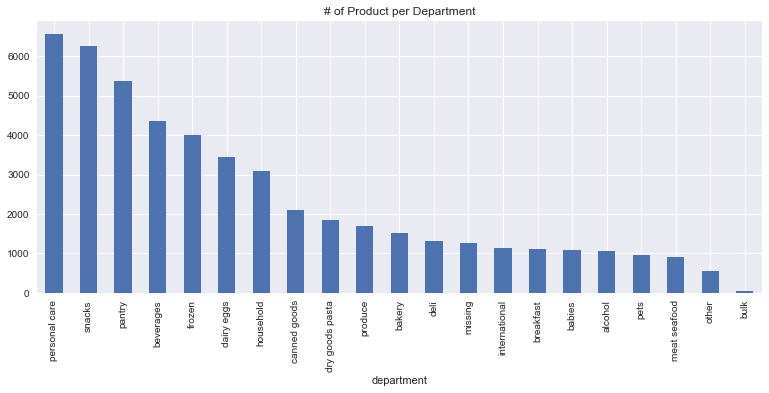

In [10]:
plt.figure(figsize=(13, 5))
df_complete_prod.groupby(['department']).count()['product_id'].copy().sort_values(ascending=False).plot(kind='bar', title='# of Product per Department')

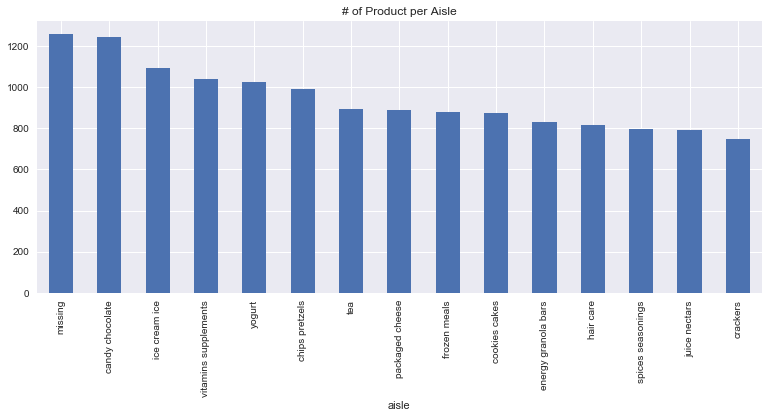

In [11]:
plt.figure(figsize=(13, 5))
df_complete_prod.groupby(['aisle']).count()['product_id'].copy().sort_values(ascending=False)[:15].plot(kind='bar', title='# of Product per Aisle')

### Now Analyze Prior product Order Data set

First we should combine Prior data with Product Dataset for some baseic analysis

In [12]:
df_prior_product = pd.merge(left=df_prior, right=df_products, how='left').drop('product_id', axis=1)
df_prior_product.head()

,order_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,1,1,Organic Egg Whites,86,16
1,2,2,1,Michigan Organic Kale,83,4
2,2,3,0,Garlic Powder,104,13
3,2,4,1,Coconut Butter,19,13
4,2,5,0,Natural Sweetener,17,13


In [13]:
df_prior_prod_dept = pd.merge(left=df_prior, right=df_complete_prod, how='left').drop('product_id', axis=1)
df_prior_prod_dept.head()

,order_id,add_to_cart_order,reordered,product_name,department,aisle
0,2,1,1,Organic Egg Whites,dairy eggs,eggs
1,2,2,1,Michigan Organic Kale,produce,fresh vegetables
2,2,3,0,Garlic Powder,pantry,spices seasonings
3,2,4,1,Coconut Butter,pantry,oils vinegars
4,2,5,0,Natural Sweetener,pantry,baking ingredients


### Top Selling Products

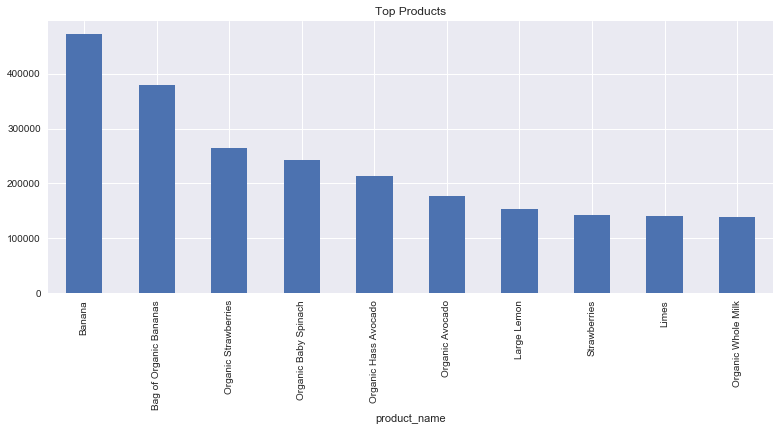

In [14]:
plt.figure(figsize=(13, 5))
df_prior_product.groupby(['product_name']).count()['order_id'].copy().sort_values(ascending=False)[:10].plot(kind='bar', title='Top Products')

### Top Selling Product Departments

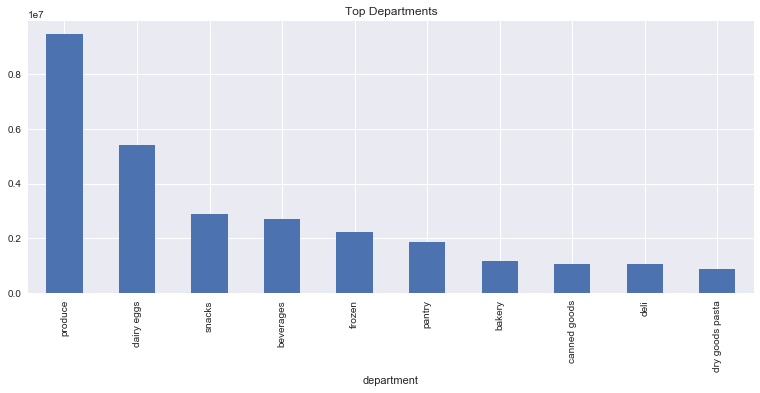

In [15]:
plt.figure(figsize=(13, 5))
df_prior_prod_dept.groupby(['department']).count()['order_id'].copy().sort_values(ascending=False)[:10].plot(kind='bar', title='Top Departments')

### Most Reordered Products

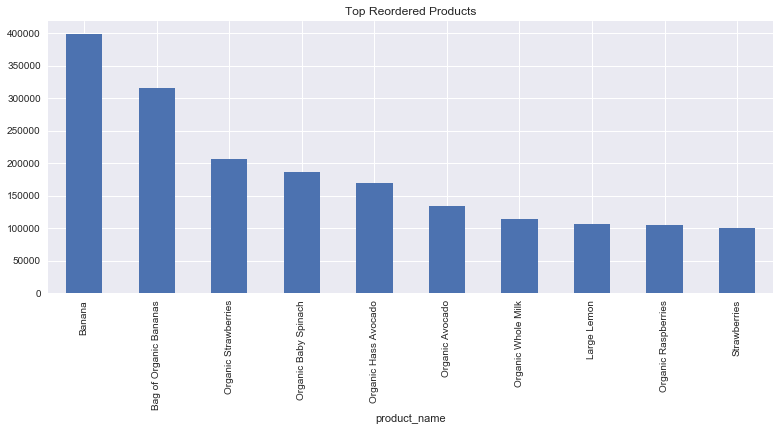

In [16]:
plt.figure(figsize=(13, 5))
df_prior_prod_dept[df_prior_prod_dept.reordered>0].groupby(['product_name']).count()['order_id'].copy().sort_values(ascending=False)[:10].plot(kind='bar', title='Top Reordered Products')

In [17]:
print("Number of products reordered are : {}".format(len(df_prior_prod_dept[df_prior_prod_dept.reordered>0].product_name.value_counts().unique())))

Number of products reordered are : 3133


### Reordered Ratio :

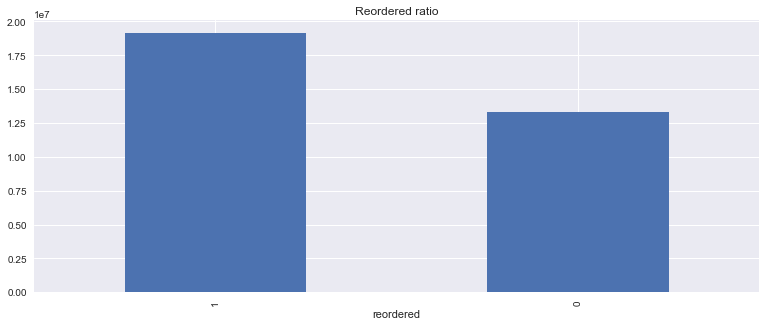

In [18]:
plt.figure(figsize=(13, 5))
df_prior_product.groupby(['reordered']).count()['order_id'].copy().sort_values(ascending=False).plot(kind='bar', title='Reordered ratio')

In [19]:
df_prior_product.reordered.value_counts()

1    19126536
0    13307953
Name: reordered, dtype: int64

In [20]:
print("Percentage of Reordering in Prior Dataset is : {} %".format(df_prior_product.reordered.sum() / df_prior_product.shape[0]*100))

Percentage of Reordering in Prior Dataset is : 58.969746679221615 %


### % of Order containing no Reordered product :

In [21]:
df_order_reordered = df_prior_product.groupby("order_id")["reordered"].aggregate("sum").reset_index()
df_order_reordered["reordered"].ix[df_order_reordered["reordered"]>1] = 1
df_order_reordered.reordered.value_counts()

1    2826361
0     388513
Name: reordered, dtype: int64

In [21]:
print("{} % of the orders in the Prior set has no-reordered products and the rest of them has atleast one reordered products.".format((1-df_order_reordered.reordered.sum() / df_order_reordered.shape[0])*100))

12.084859313304353 % of the orders in the Prior set has no-reordered products and the rest of them has atleast one reordered products.
